In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r'C:/Users/Admin/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.shape

(1470, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# Data Preprocessing part1
df.select_dtypes(include='object').nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [6]:
# remove one value columns
df.drop(columns='Over18',inplace=True)

In [8]:
df.select_dtypes(exclude='object').nunique()

Age                           43
DailyRate                    886
DistanceFromHome              29
Education                      5
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobSatisfaction                4
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
dtype: int64

In [9]:
# remove one unique values
df.drop(columns=['StandardHours','EmployeeCount'],inplace=True)

In [10]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [11]:
df.shape

(1470, 32)

In [17]:
cat_vars = df.select_dtypes(include='object').columns.tolist()

In [16]:
cat_vars

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [18]:
cat_vars

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [23]:
num_vars = df.select_dtypes(exclude='object').columns
num_vars

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

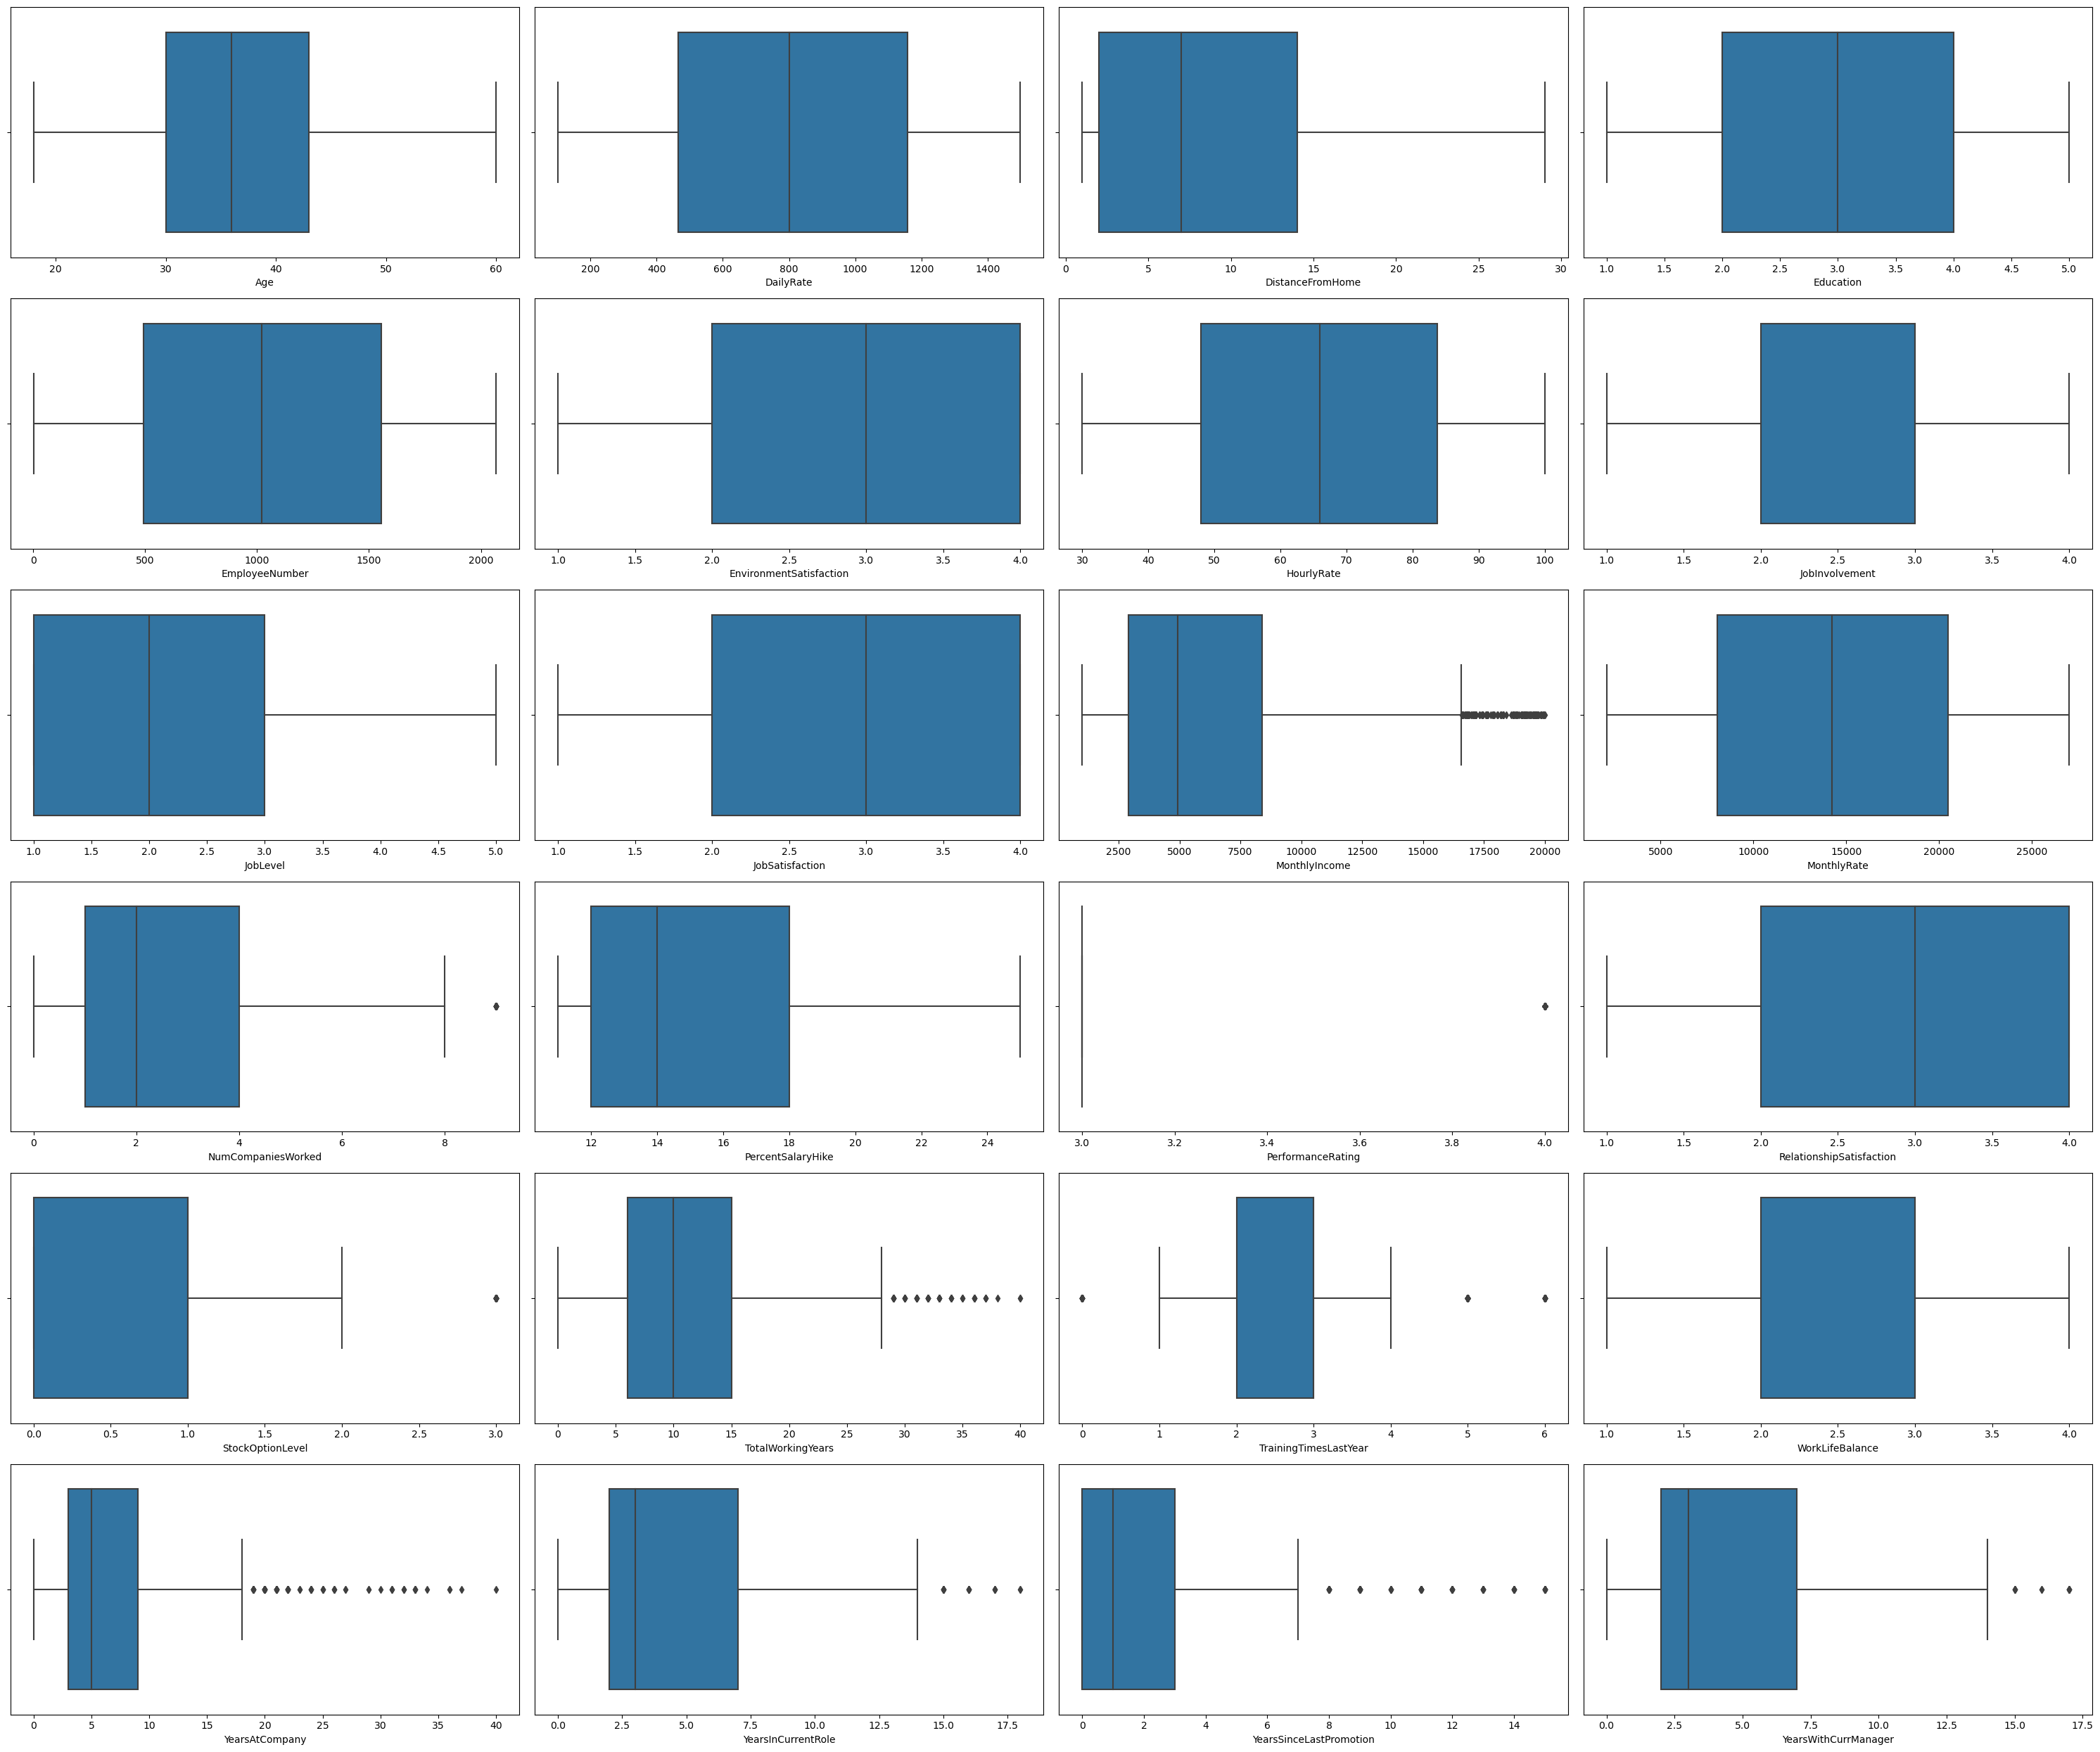

In [25]:

fig,axs = plt.subplots(nrows=6,ncols=4,figsize=(30,25))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var,data=df,ax=axs[i])
    
    
fig.tight_layout()

plt.show()

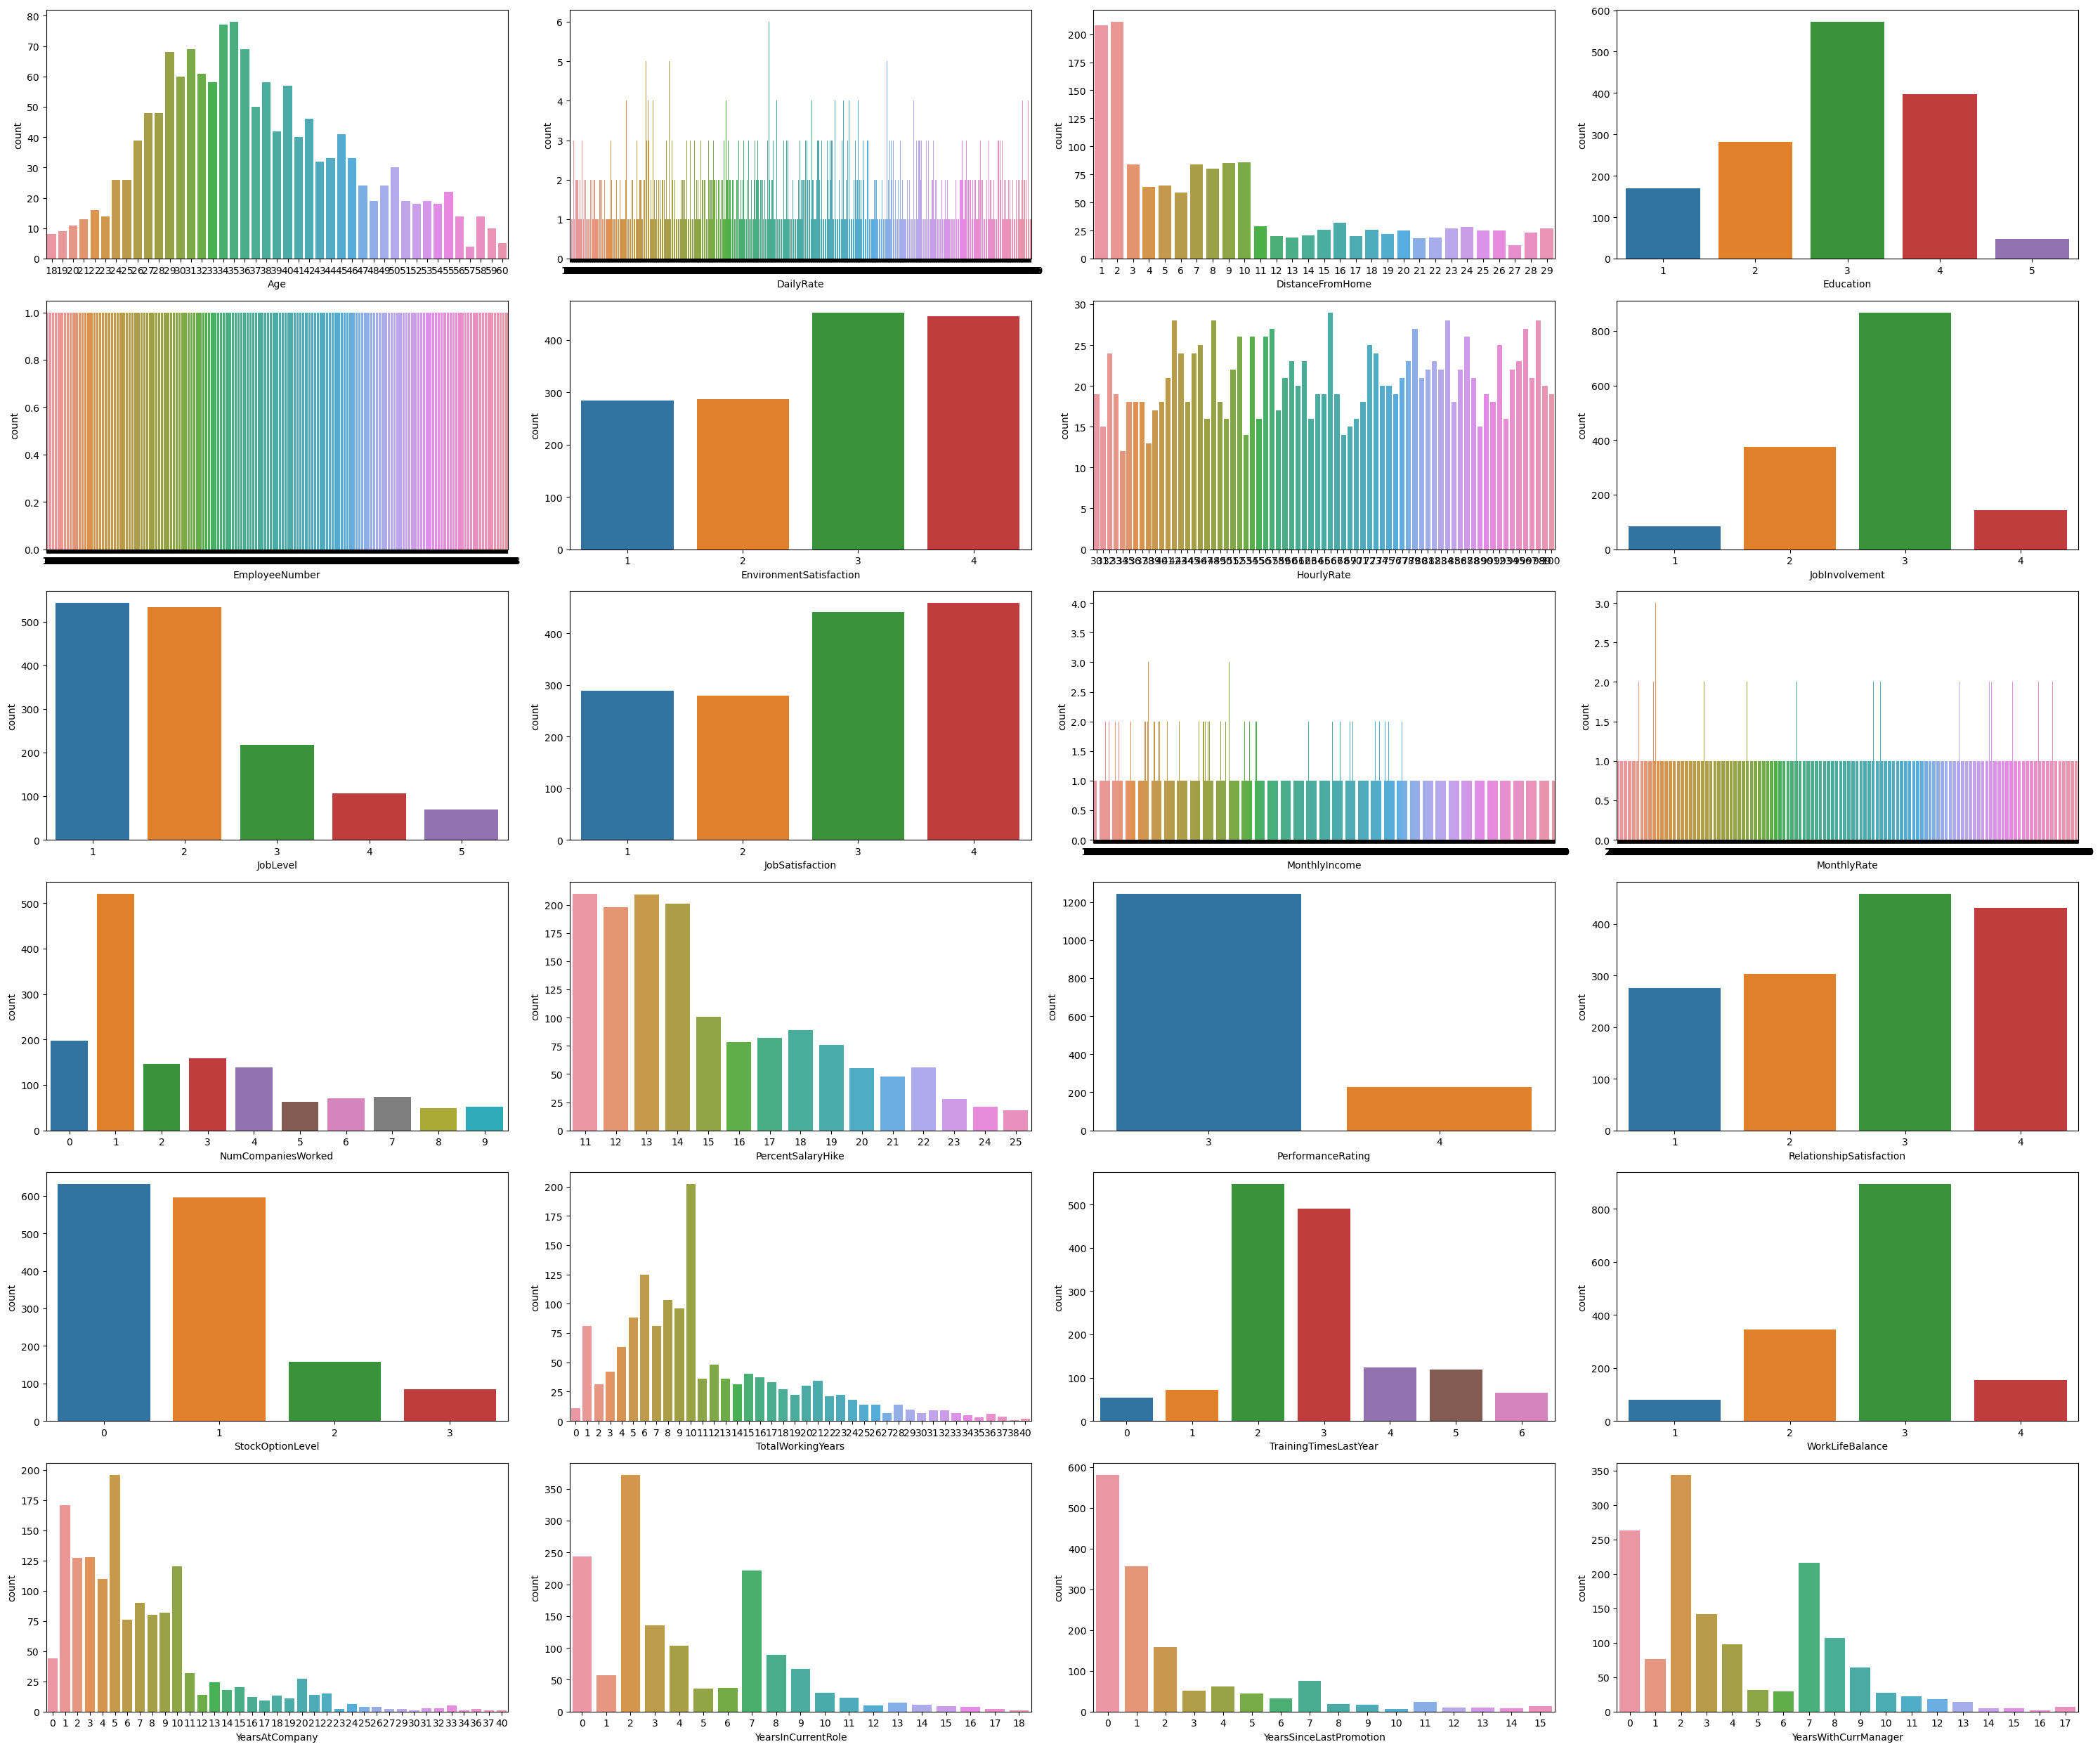

In [26]:

fig,axs = plt.subplots(nrows=6,ncols=4,figsize=(30,25))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.countplot(x=var,data=df,ax=axs[i])
    
    
fig.tight_layout()

plt.show()

IndexError: index 20 is out of bounds for axis 0 with size 20

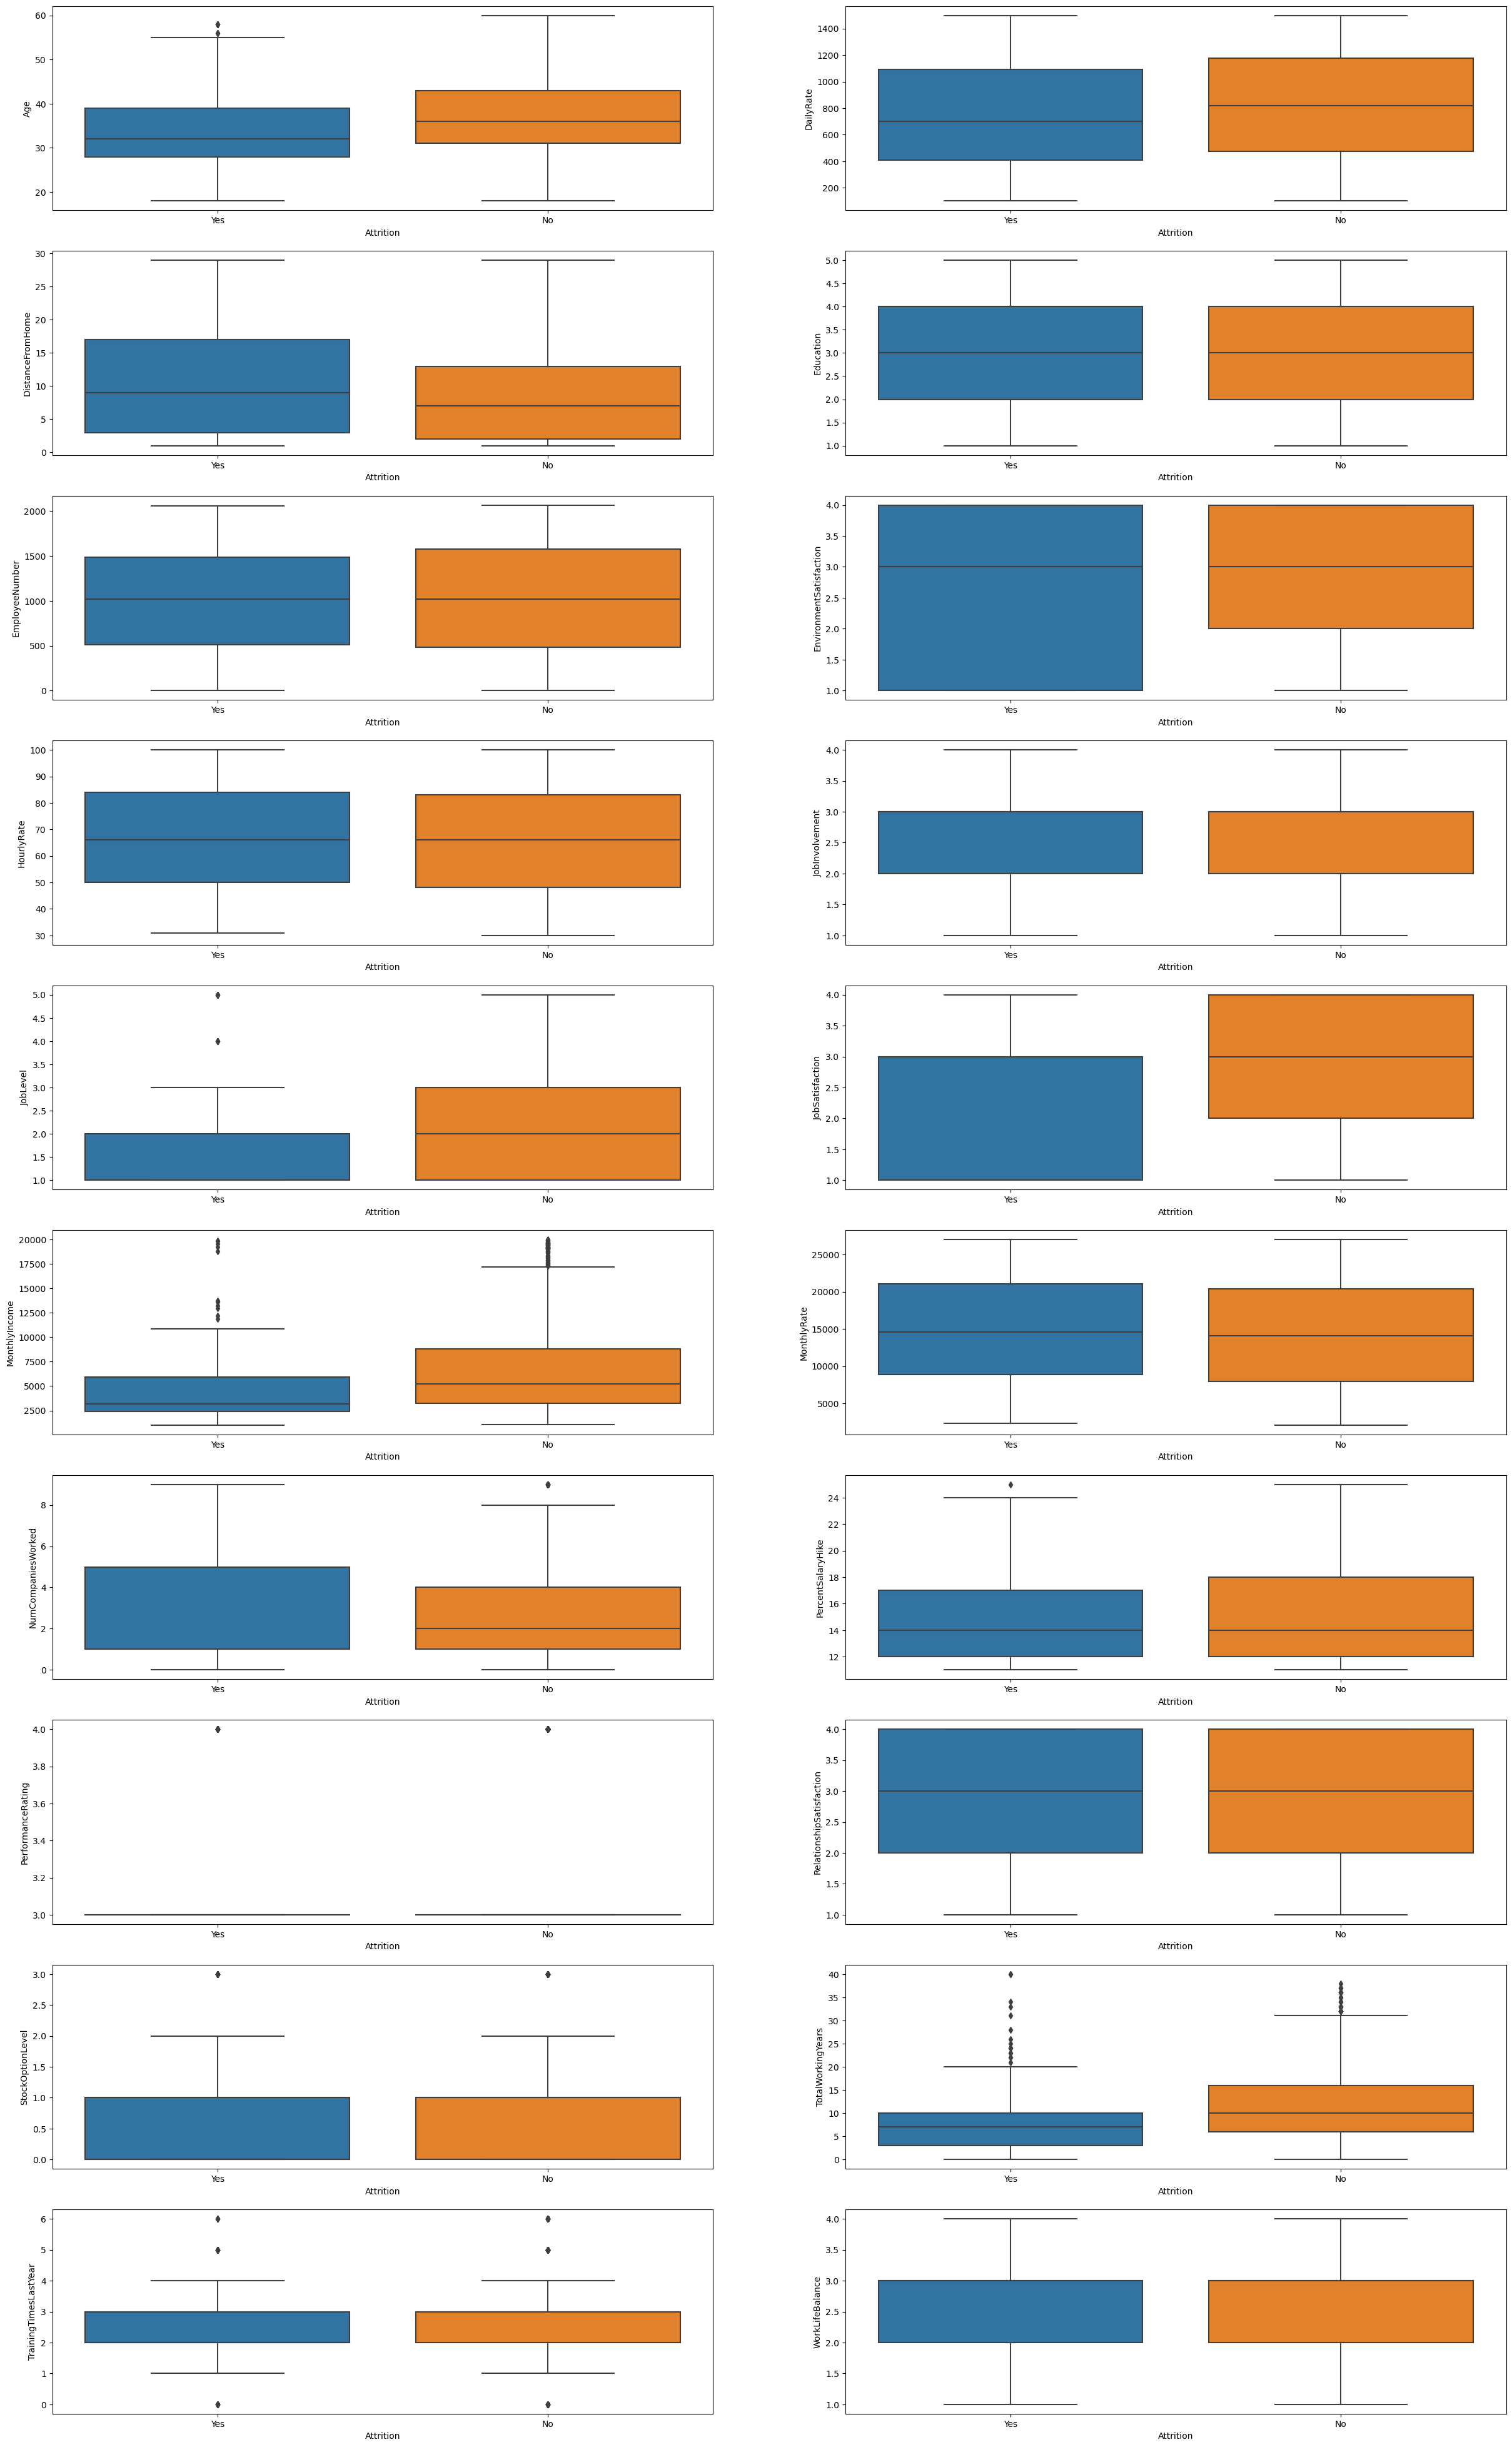

In [29]:

fig,axs = plt.subplots(nrows=10,ncols=2,figsize=(30,50))
axs =axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(y=var,x='Attrition',data=df,ax=axs[i])


fig.tight_layout()

plt.show()



In [31]:
check_missing = df.isnull().sum()*100/df.shape[0]

In [32]:
check_missing[check_missing>0].sort_values()

Series([], dtype: float64)

In [33]:
df.shape

(1470, 32)

In [34]:
df.shape[0]

1470

In [36]:
# label Encodeing
for col in df.select_dtypes(include=['object']).columns:
    
    
    print(f"{col}:{df[col].unique()}")
                          

Attrition:['Yes' 'No']
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department:['Sales' 'Research & Development' 'Human Resources']
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender:['Female' 'Male']
JobRole:['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus:['Single' 'Married' 'Divorced']
OverTime:['Yes' 'No']


In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
lb = LabelEncoder()

In [40]:
for col in df.select_dtypes(include=['object']).columns:
    
    lb.fit(df[col].unique())
    
    df[col] = lb.transform(df[col])
    
    print(f"{col}:{df[col].unique()}")

Attrition:[1 0]
BusinessTravel:[2 1 0]
Department:[2 1 0]
EducationField:[1 4 3 2 5 0]
Gender:[0 1]
JobRole:[7 6 2 4 0 3 8 5 1]
MaritalStatus:[2 1 0]
OverTime:[1 0]


<AxesSubplot:>

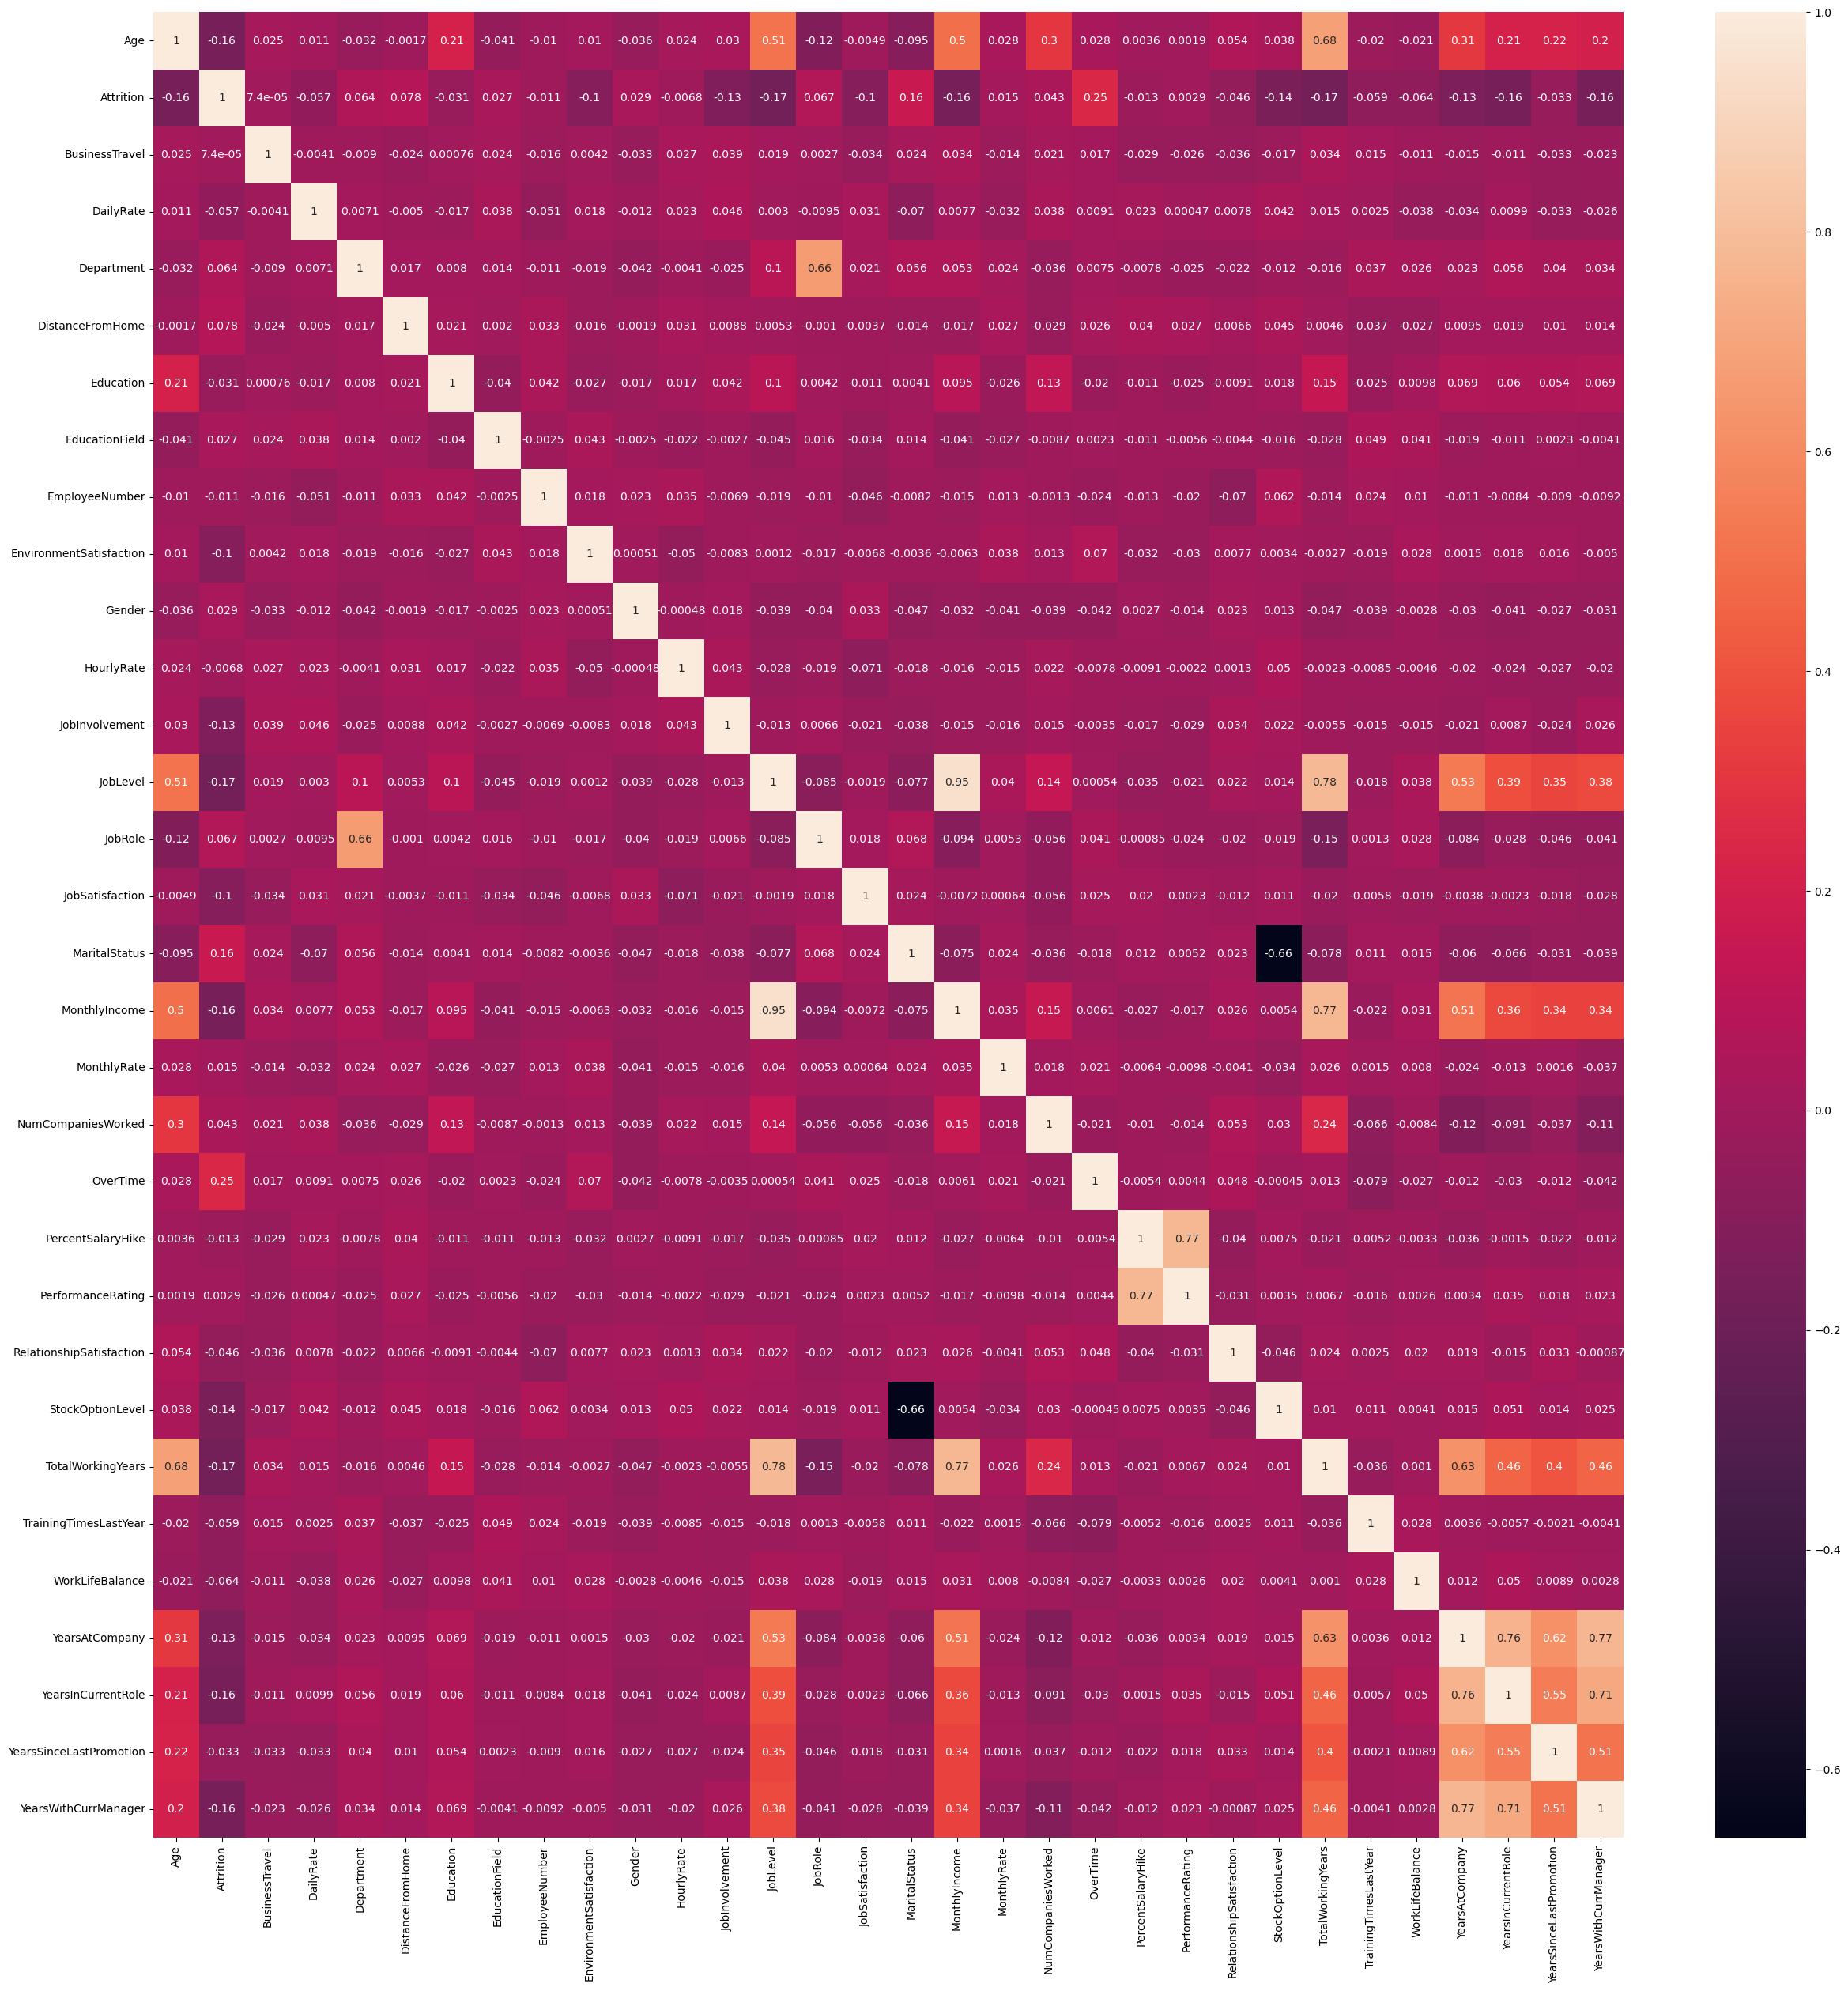

In [42]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),fmt='.2g',annot = True)

In [44]:
# remove jobevel column because it have 100% correlation with monthly income
df.drop(columns='JobLevel',inplace=True)

In [45]:
# split data
x = df.drop('Attrition',axis=1)
y = df['Attrition']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [46]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth':[3,4,5,6,7,8],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2,3,4],
    'random_state':[0,42]
}

# perform to grid search cross validation to find the best paramater
grid_search = GridSearchCV(dtree,param_grid,cv=5)
grid_search.fit(X_train,Y_train)

print(grid_search.best_params_)

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}


In [48]:
dtree = DecisionTreeClassifier(max_depth= 3, min_samples_leaf= 1, min_samples_split=2, random_state= 42)
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [52]:
y_pred = dtree.predict(X_test)
print('Accuracy score on test:',accuracy_score(Y_test,y_pred))

Accuracy score on test: 0.8299319727891157
